In [4]:
# install photutils library
!pip install photutils

In [5]:
# import necesssary python libraries
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from astropy.io import fits

from astropy.visualization import (
    ImageNormalize,
    AsinhStretch,
    LogStretch,
    LinearStretch,
    SqrtStretch,
    ZScaleInterval,
    MinMaxInterval
)
from astropy.stats import sigma_clipped_stats
# from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture, aperture_photometry

In [6]:
# plotting configuration/pretty plots. this cell can be removed without any loss
plt.rcParams.update({
    'font.size': 14,                # Base font size
    'font.family': 'serif',         # Use serif fonts (looks like LaTeX)
    'axes.labelsize': 16,           # X and Y label size
    'axes.titlesize': 18,           # Title size
    'xtick.labelsize': 14,          # X-tick label size
    'ytick.labelsize': 14,          # Y-tick label size
    'legend.fontsize': 14,          # Legend font size
    'figure.figsize': (6, 6),      # Default figure size
    'figure.autolayout': True,      # Auto-adjust layout to prevent label clipping
    'lines.linewidth': 2.5,         # Thicker lines for better visibility
    'lines.markersize': 8,          # Larger markers
})

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# M104 Light

In [8]:
# load the image, and see its info
hdul = fits.open('/content/drive/MyDrive/Data/M104/Light_M 104_167deg_120.0s_Bin1_B_gain121_20260116-034230_0006.fit')
hdul.info()

Filename: /content/drive/MyDrive/Data/M104/Light_M 104_167deg_120.0s_Bin1_B_gain121_20260116-034230_0006.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      78   (3008, 3008)   int16 (rescales to uint16)   


In [9]:
hdu = hdul[0]
hdu.header  # print all the header info

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3008 / length of data axis 1                          
NAXIS2  =                 3008 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
CREATOR = 'ZWO ASIAIR PRO'     / Capture software                               
OFFSET  =                   70 / camera offset                                  
XORGSUBF=                   

In [10]:
# normalization for viewing FITS images
# these normalizations don't affect the results, and strictly affects only the
# viewing of the plots

# we choose the following, which corresponds to zscale, linear in ds9 scaling
# stretch = AsinhStretch()
stretch = LinearStretch()
interval = ZScaleInterval()

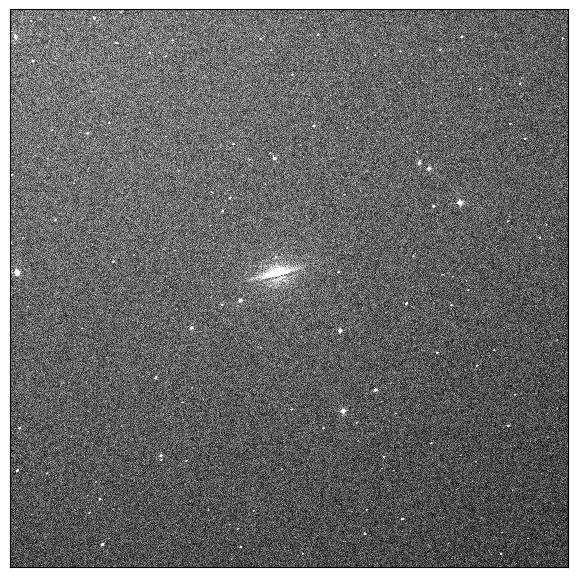

In [11]:
# viewing the image without any correction/reduction
img = hdu.data * 1.0  # converting to float64

norm = ImageNormalize(img, interval=interval, stretch=stretch)

plt.imshow(img, norm=norm, interpolation='nearest', origin='lower', cmap='gray')
# you can choose cmap='viridis', or something else too!
plt.xticks([]) # don't plot the x-axis labels and ticks
plt.yticks([]) # don't plot the y-axis labels and ticks
plt.show()

In [15]:
hdu.header['OFFSET']
# subtract the offset from your image

70

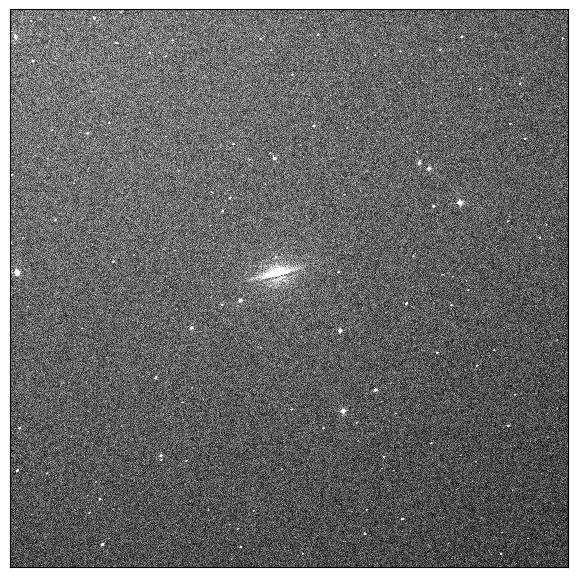

In [17]:
# with the corrections (PEDESTAL/OFFSET), and in electron units
img = img - hdu.header['OFFSET']  # cancelling the offset
img = img * hdu.header['EGAIN']  # converting to electron units

norm = ImageNormalize(img, interval=interval, stretch=stretch)

plt.imshow(img, norm=norm, interpolation='nearest', origin='lower', cmap='gray')

plt.xticks([])
plt.yticks([])
plt.show()

# Dark frame

In [33]:
# load the image, and see its info
hdul1 = fits.open('/content/drive/MyDrive/Data/Dark/Dark_167deg_120.0s_Bin1_L_gain121_20260116-071915_0003.fit')
hdul1.info()

Filename: /content/drive/MyDrive/Data/Dark/Dark_167deg_120.0s_Bin1_L_gain121_20260116-071915_0003.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (3008, 3008)   int16 (rescales to uint16)   


In [34]:
hdu1 = hdul1[0]
hdu1.header  # print all the header info

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3008 / length of data axis 1                          
NAXIS2  =                 3008 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
CREATOR = 'ZWO ASIAIR PRO'     / Capture software                               
OFFSET  =                   70 / camera offset                                  
XORGSUBF=                   

In [35]:
# normalization for viewing FITS images
# these normalizations don't affect the results, and strictly affects only the
# viewing of the plots

# we choose the following, which corresponds to zscale, linear in ds9 scaling
# stretch = AsinhStretch()
stretch = LinearStretch()
interval = ZScaleInterval()


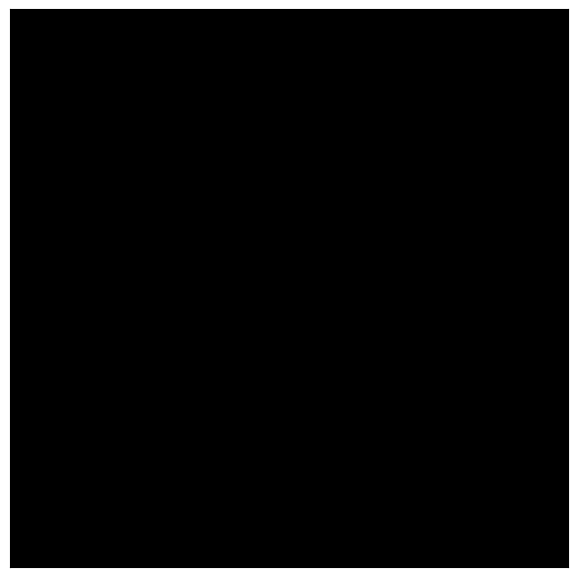

In [36]:
# viewing the image without any correction/reduction
img1 = hdu1.data * 1.0  # converting to float64

norm = ImageNormalize(img1, interval=interval, stretch=stretch)

plt.imshow(img1, norm=norm, interpolation='nearest', origin='lower', cmap='gray')
# you can choose cmap='viridis', or something else too!
plt.xticks([]) # don't plot the x-axis labels and ticks
plt.yticks([]) # don't plot the y-axis labels and ticks
plt.show()

In [25]:
hdu.header['OFFSET']
# subtract the offset from your image

70

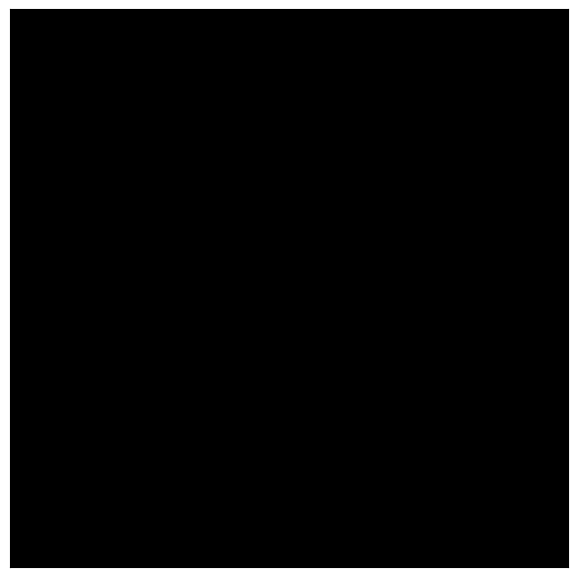

In [50]:
# with the corrections (PEDESTAL/OFFSET), and in electron units
img1 = img1- hdu1.header['OFFSET']  # cancelling the offset
img1 = img1 * hdu1.header['EGAIN']  # converting to electron units

norm = ImageNormalize(img1, interval=interval, stretch=stretch)

plt.imshow(img1, norm=norm, interpolation='nearest', origin='lower', cmap='gray')

plt.xticks([])
plt.yticks([])
plt.show()

# Bias Frame

In [37]:
# load the image, and see its info
hdul2 = fits.open('/content/drive/MyDrive/Data/Bias/Bias_167deg_1.0ms_Bin1_L_gain121_20260116-070616_0004.fit')
hdul2.info()

Filename: /content/drive/MyDrive/Data/Bias/Bias_167deg_1.0ms_Bin1_L_gain121_20260116-070616_0004.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (3008, 3008)   int16 (rescales to uint16)   


In [38]:
hdu2 = hdul2[0]
hdu2.header  # print all the header info

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3008 / length of data axis 1                          
NAXIS2  =                 3008 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
CREATOR = 'ZWO ASIAIR PRO'     / Capture software                               
OFFSET  =                   70 / camera offset                                  
XORGSUBF=                   

In [30]:
# normalization for viewing FITS images
# these normalizations don't affect the results, and strictly affects only the
# viewing of the plots

# we choose the following, which corresponds to zscale, linear in ds9 scaling
# stretch = AsinhStretch()
stretch = LinearStretch()
interval = ZScaleInterval()

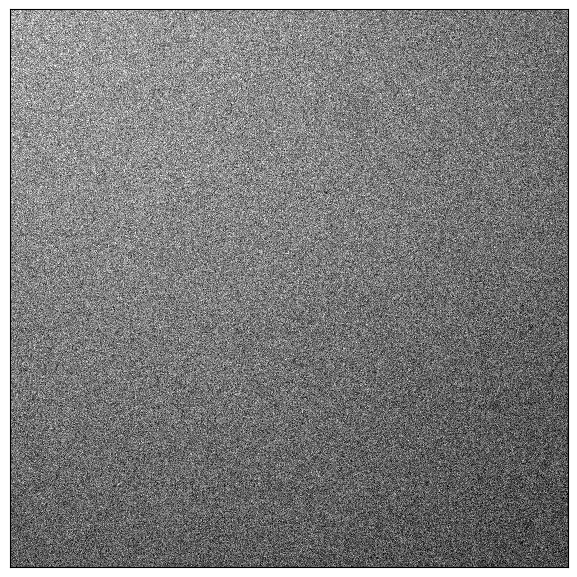

In [41]:
# viewing the image without any correction/reduction
img2 = hdu2.data * 1.0  # converting to float64

norm = ImageNormalize(img2, interval=interval, stretch=stretch)

plt.imshow(img2, norm=norm, interpolation='nearest', origin='lower', cmap='gray')
# you can choose cmap='viridis', or something else too!
plt.xticks([]) # don't plot the x-axis labels and ticks
plt.yticks([]) # don't plot the y-axis labels and ticks
plt.show()

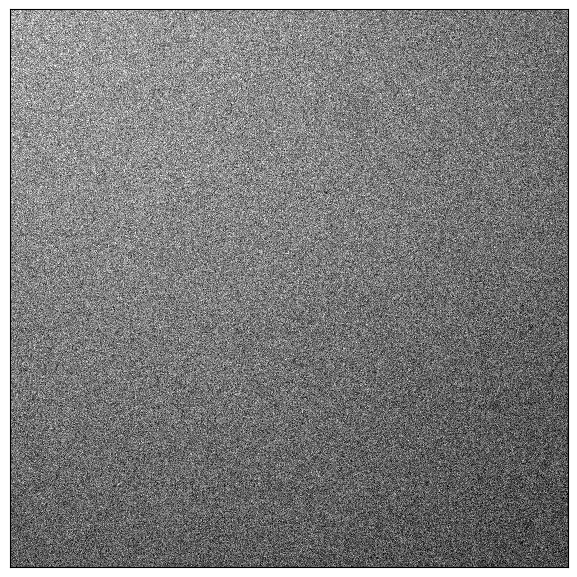

In [52]:
# with the corrections (PEDESTAL/OFFSET), and in electron units
img2 = img2 - hdu2.header['OFFSET']  # cancelling the offset
img2 = img2 * hdu2.header['EGAIN']  # converting to electron units

norm = ImageNormalize(img2, interval=interval, stretch=stretch)

plt.imshow(img2, norm=norm, interpolation='nearest', origin='lower', cmap='gray')

plt.xticks([])
plt.yticks([])
plt.show()

# Flat Frame

In [43]:
# load the image, and see its info
hdul3 = fits.open('/content/drive/MyDrive/Data/Flat/Flat_167deg_70.0ms_Bin1_L_gain121_20260116-070554_0006.fit')
hdul3.info()

Filename: /content/drive/MyDrive/Data/Flat/Flat_167deg_70.0ms_Bin1_L_gain121_20260116-070554_0006.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (3008, 3008)   int16 (rescales to uint16)   


In [44]:
hdu3 = hdul3[0]
hdu3.header  # print all the header info

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3008 / length of data axis 1                          
NAXIS2  =                 3008 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
CREATOR = 'ZWO ASIAIR PRO'     / Capture software                               
OFFSET  =                   70 / camera offset                                  
XORGSUBF=                   

In [45]:
# normalization for viewing FITS images
# these normalizations don't affect the results, and strictly affects only the
# viewing of the plots

# we choose the following, which corresponds to zscale, linear in ds9 scaling
# stretch = AsinhStretch()
stretch = LinearStretch()
interval = ZScaleInterval()


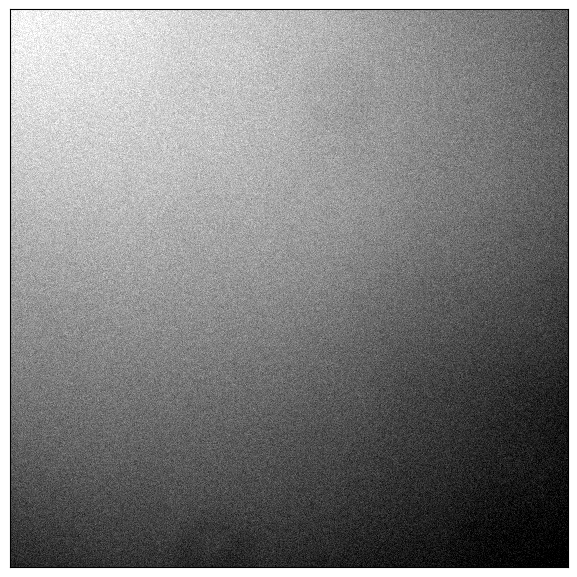

In [47]:
# viewing the image without any correction/reduction
img3 = hdu3.data * 1.0  # converting to float64

norm = ImageNormalize(img3, interval=interval, stretch=stretch)

plt.imshow(img3, norm=norm, interpolation='nearest', origin='lower', cmap='gray')
# you can choose cmap='viridis', or something else too!
plt.xticks([]) # don't plot the x-axis labels and ticks
plt.yticks([]) # don't plot the y-axis labels and ticks
plt.show()

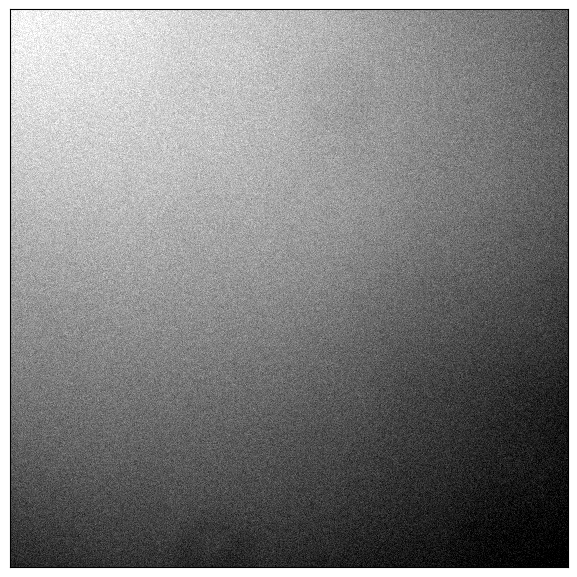

In [48]:
# with the corrections (PEDESTAL/OFFSET), and in electron units
img3 = img3 - hdu.header['OFFSET']  # cancelling the offset
img3 = img3 * hdu.header['EGAIN']  # converting to electron units

norm = ImageNormalize(img3, interval=interval, stretch=stretch)

plt.imshow(img3, norm=norm, interpolation='nearest', origin='lower', cmap='gray')

plt.xticks([])
plt.yticks([])
plt.show()